<a href="https://colab.research.google.com/github/swee-27/Data-science-project/blob/main/Employee_Retention_And_Satisfaction_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
# Load dataset
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Check first few rows
print(df.head())

# Check dataset info
print(df.info())

# Check for missing values
print(df.isnull().sum())


   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

In [ ]:
categorical_cols = df.select_dtypes(include='object').columns
print(categorical_cols)

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')


In [ ]:
# Encode Attrition as 0 (No) and 1 (Yes)
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})


In [ ]:
# Binary columns -> Label Encoding
binary_cols = ['Gender', 'OverTime']
le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

# Remaining categorical columns -> One-Hot Encoding
df = pd.get_dummies(df, columns=['BusinessTravel','Department','EducationField','JobRole','MaritalStatus'], drop_first=True)


In [ ]:
# Identify numeric columns
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
numeric_cols = numeric_cols.drop('Attrition')  # Exclude target

# Apply Standard Scaling
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [ ]:
print(df.head())
print(df.shape)


        Age  Attrition  DailyRate  DistanceFromHome  Education  EmployeeCount  \
0  0.446350          1   0.742527         -1.010909  -0.891688            0.0   
1  1.322365          0  -1.297775         -0.147150  -1.868426            0.0   
2  0.008343          1   1.414363         -0.887515  -0.891688            0.0   
3 -0.429664          0   1.461466         -0.764121   1.061787            0.0   
4 -1.086676          0  -0.524295         -0.887515  -1.868426            0.0   

   EmployeeNumber  EnvironmentSatisfaction    Gender  HourlyRate  ...  \
0       -1.701283                -0.660531 -1.224745    1.383138  ...   
1       -1.699621                 0.254625  0.816497   -0.240677  ...   
2       -1.696298                 1.169781  0.816497    1.284725  ...   
3       -1.694636                 1.169781 -1.224745   -0.486709  ...   
4       -1.691313                -1.575686  0.816497   -1.274014  ...   

   JobRole_Human Resources  JobRole_Laboratory Technician  JobRole_Manager

In [ ]:
df.to_csv("HR_Employee_Attrition_Preprocessed.csv", index=False)


In [ ]:
#EDA PROCESS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: make plots look better
sns.set(style="whitegrid")
%matplotlib inline


In [ ]:
df = pd.read_csv("HR_Employee_Attrition_Preprocessed.csv")
df.head()


,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,0.446350,1,0.742527,-1.010909,-0.891688,0.0,-1.701283,-0.660531,-1.224745,1.383138,...,False,False,False,False,False,False,True,False,False,True
1,1.322365,0,-1.297775,-0.147150,-1.868426,0.0,-1.699621,0.254625,0.816497,-0.240677,...,False,False,False,False,False,True,False,False,True,False
2,0.008343,1,1.414363,-0.887515,-0.891688,0.0,-1.696298,1.169781,0.816497,1.284725,...,False,True,False,False,False,False,False,False,False,True
3,-0.429664,0,1.461466,-0.764121,1.061787,0.0,-1.694636,1.169781,-1.224745,-0.486709,...,False,False,False,False,False,True,False,False,True,False
4,-1.086676,0,-0.524295,-0.887515,-1.868426,0.0,-1.691313,-1.575686,0.816497,-1.274014,...,False,True,False,False,False,False,False,False,True,False


In [ ]:
# Summary of numeric columns
print(df.describe())

# Summary of categorical columns
print(df.describe(include='object'))

# Check attrition distribution
print(df['Attrition'].value_counts(normalize=True))


                Age    Attrition     DailyRate  DistanceFromHome  \
count  1.470000e+03  1470.000000  1.470000e+03      1.470000e+03   
mean  -4.229421e-17     0.161224  4.833624e-17      4.833624e-18   
std    1.000340e+00     0.367863  1.000340e+00      1.000340e+00   
min   -2.072192e+00     0.000000 -1.736576e+00     -1.010909e+00   
25%   -7.581700e-01     0.000000 -8.366616e-01     -8.875151e-01   
50%   -1.011589e-01     0.000000 -1.204135e-03     -2.705440e-01   
75%    6.653541e-01     0.000000  8.788772e-01      5.932157e-01   
max    2.526886e+00     1.000000  1.726730e+00      2.444129e+00   

          Education  EmployeeCount  EmployeeNumber  EnvironmentSatisfaction  \
count  1.470000e+03         1470.0    1.470000e+03             1.470000e+03   
mean  -4.350262e-17            0.0   -2.320140e-16             7.612958e-17   
std    1.000340e+00            0.0    1.000340e+00             1.000340e+00   
min   -1.868426e+00            0.0   -1.701283e+00            -1.575686

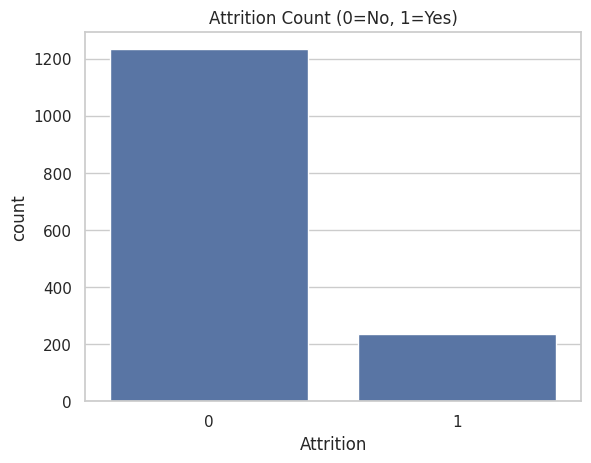

In [ ]:
sns.countplot(x='Attrition', data=df)
plt.title("Attrition Count (0=No, 1=Yes)")
plt.show()


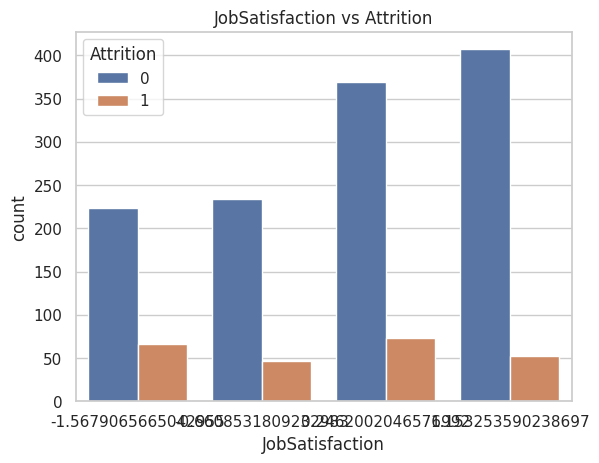

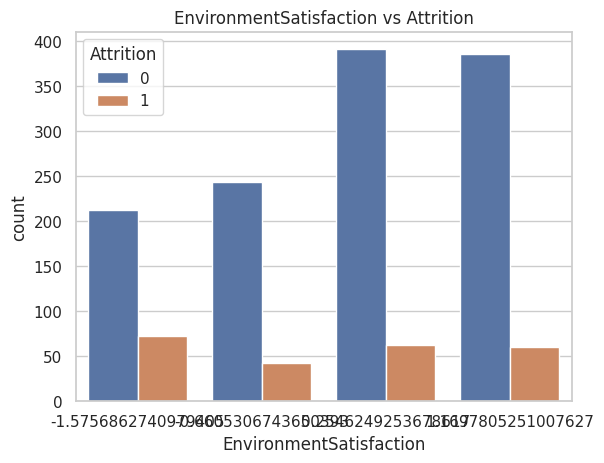

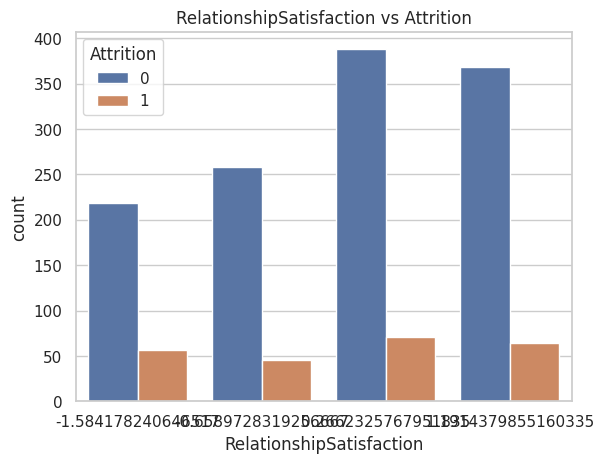

In [ ]:
satisfaction_cols = ['JobSatisfaction', 'EnvironmentSatisfaction', 'RelationshipSatisfaction']
for col in satisfaction_cols:
    sns.countplot(x=col, hue='Attrition', data=df)
    plt.title(f"{col} vs Attrition")
    plt.show()


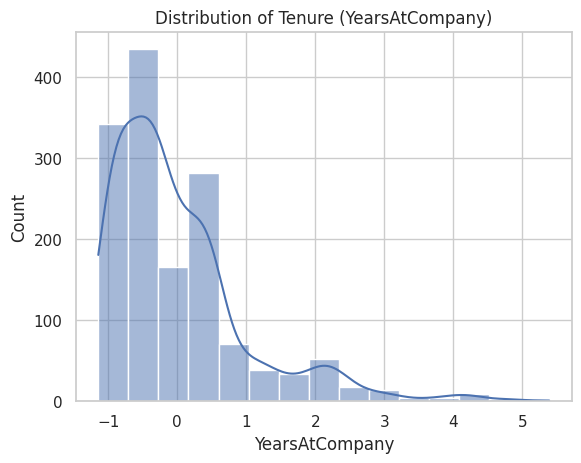

In [ ]:
sns.histplot(df['YearsAtCompany'], bins=15, kde=True)
plt.title("Distribution of Tenure (YearsAtCompany)")
plt.show()


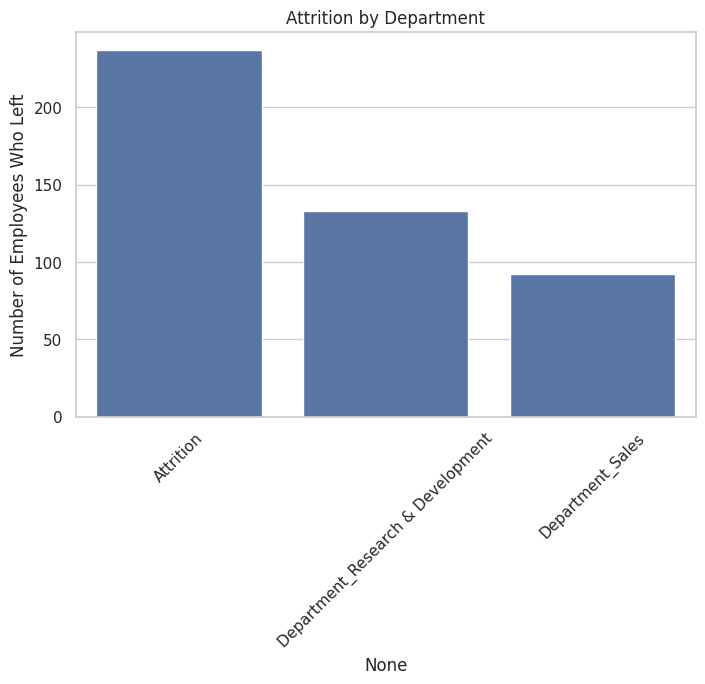

In [ ]:
dept_cols = [col for col in df.columns if 'Department_' in col]
dept_attrition = df[dept_cols + ['Attrition']].copy()
dept_attrition = dept_attrition.mul(df['Attrition'], axis=0)
dept_attrition_sum = dept_attrition.sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=dept_attrition_sum.index, y=dept_attrition_sum.values)
plt.xticks(rotation=45)
plt.ylabel("Number of Employees Who Left")
plt.title("Attrition by Department")
plt.show()


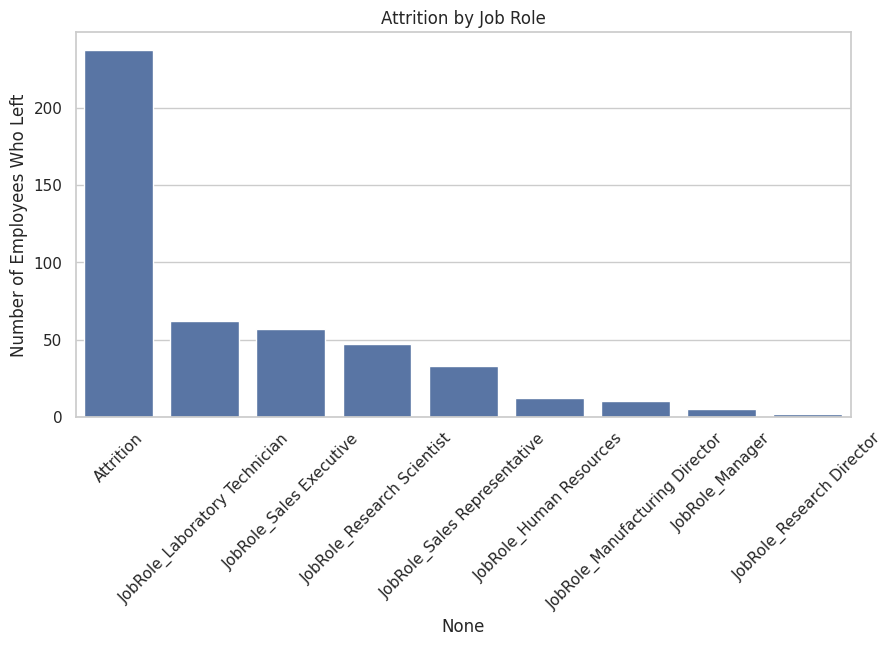

In [ ]:
role_cols = [col for col in df.columns if 'JobRole_' in col]
role_attrition = df[role_cols + ['Attrition']].copy()
role_attrition = role_attrition.mul(df['Attrition'], axis=0)
role_attrition_sum = role_attrition.sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=role_attrition_sum.index, y=role_attrition_sum.values)
plt.xticks(rotation=45)
plt.ylabel("Number of Employees Who Left")
plt.title("Attrition by Job Role")
plt.show()


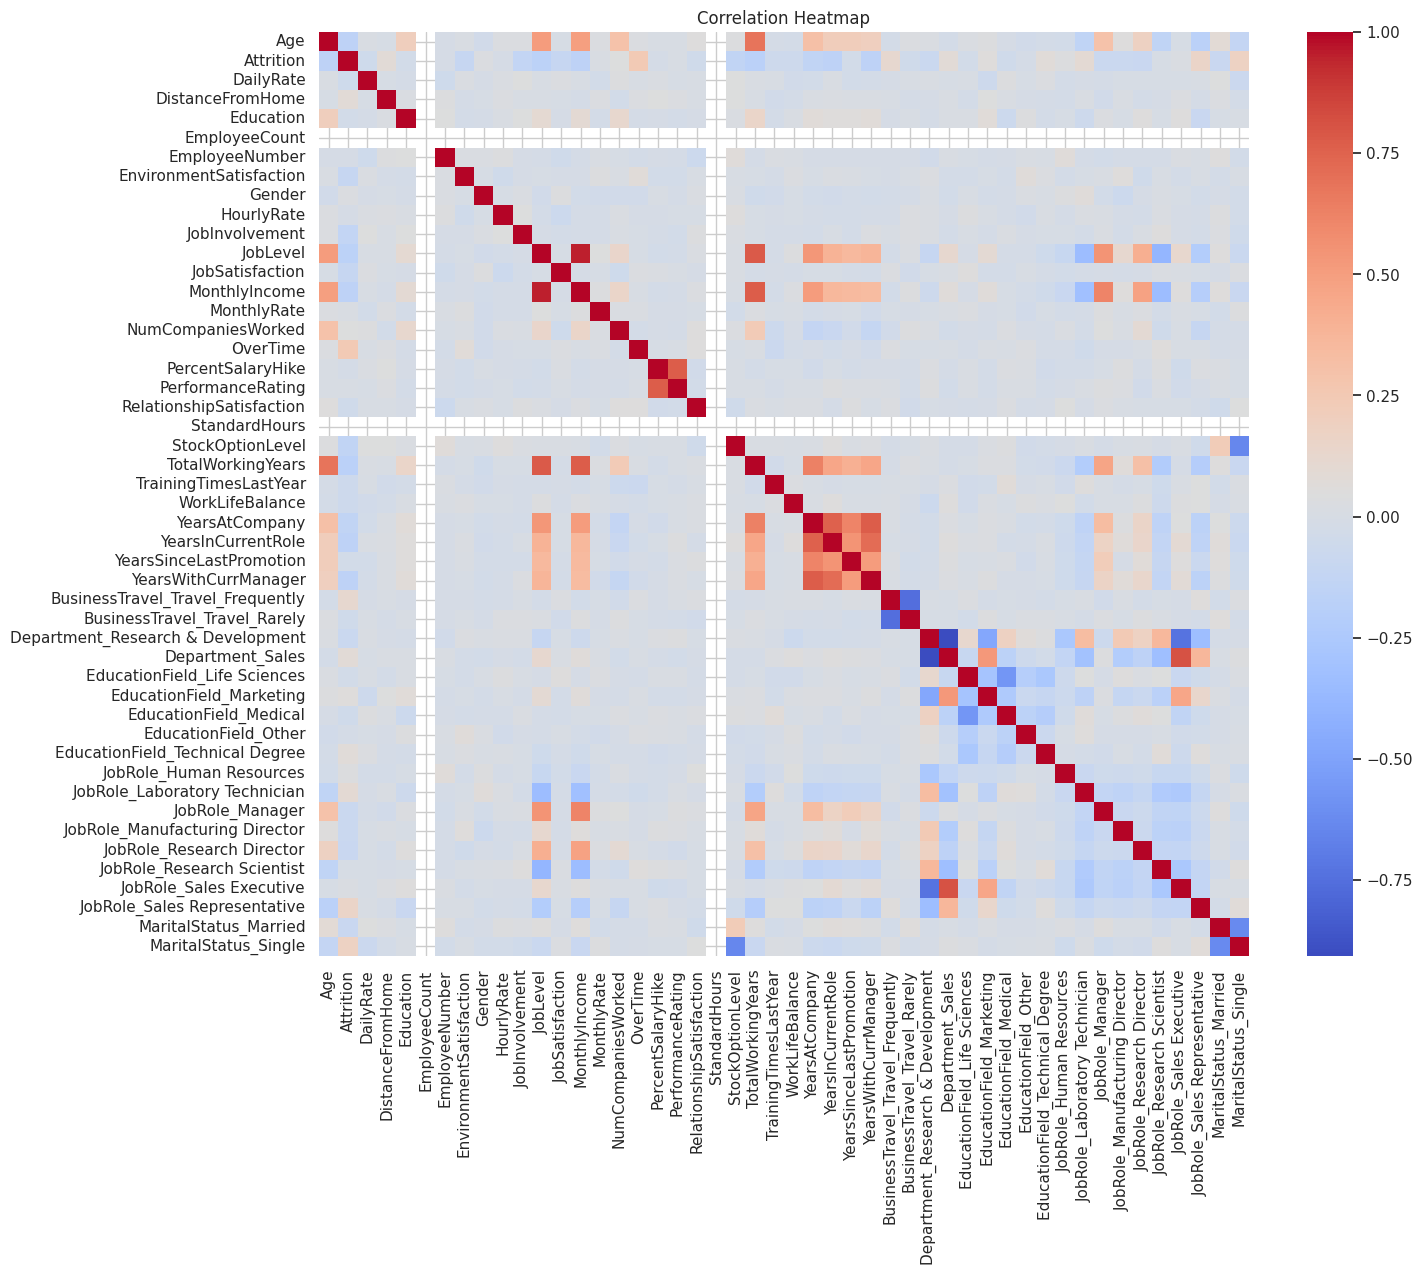

In [ ]:
# Drop the 'Over18' column as it has only one unique value and is causing an error in correlation calculation
# df = df.drop('Over18', axis=1) # This line is removed as the column is already dropped.

plt.figure(figsize=(15,12))
corr = df.corr()
sns.heatmap(corr, annot=False, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

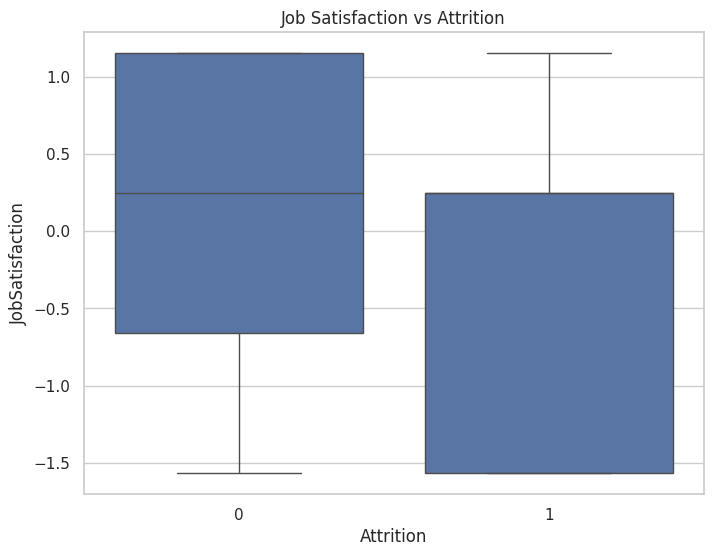

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Attrition', y='JobSatisfaction', data=df)
plt.title("Job Satisfaction vs Attrition")
plt.show()


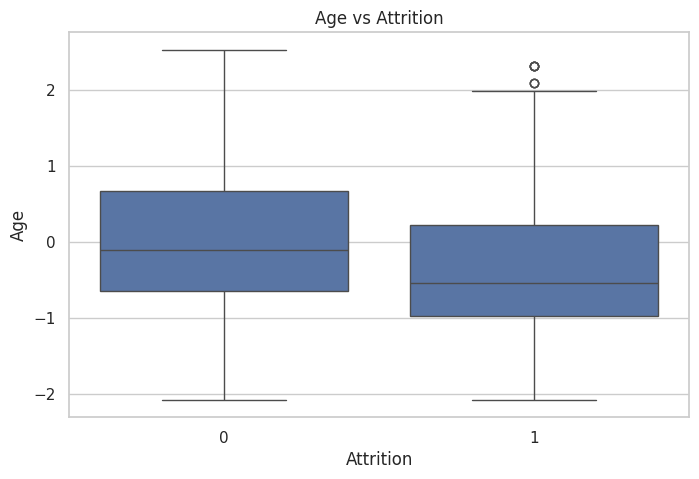

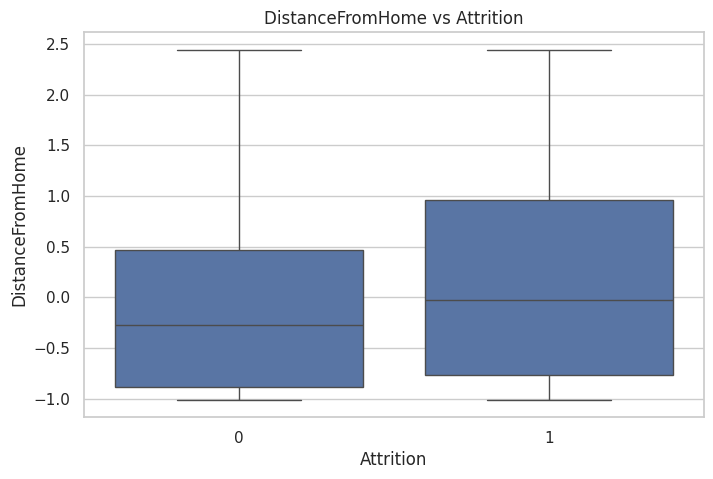

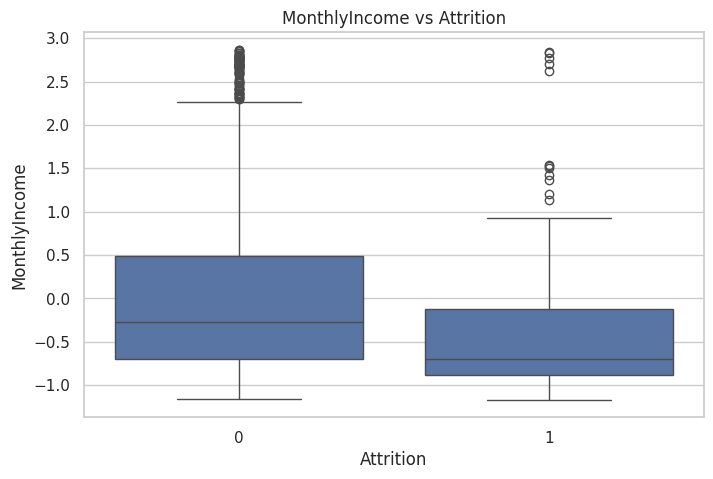

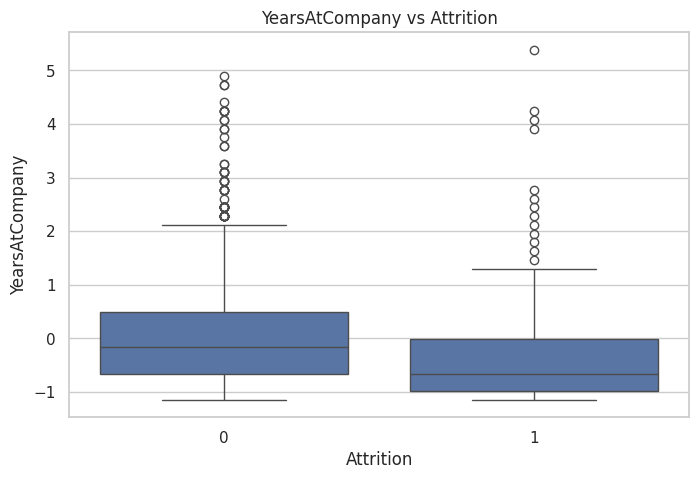

In [ ]:
numeric_cols = ['Age','DistanceFromHome','MonthlyIncome','YearsAtCompany']

for col in numeric_cols:
    plt.figure(figsize=(8,5))
    sns.boxplot(x='Attrition', y=col, data=df)
    plt.title(f"{col} vs Attrition")
    plt.show()


In [ ]:
# Retention Rate by Department
retention_by_dept = df.groupby('Department_Research & Development')['Attrition'].agg(['mean','count'])
retention_by_dept.to_csv("Retention_By_Department.csv")
